Data **Preprocessing**

In [1]:
import pandas as pd
import numpy as np

# Setting seed for reproducibility
np.random.seed(42)

# Number of rows
n = 300

# Generate CustomerID
customer_id = np.arange(1, n+1)

# Age with some missing values
age = np.random.randint(18, 70, size=n).astype(float)
age[np.random.choice(n, 20, replace=False)] = np.nan  # 20 missing values

# Gender with some missing values
genders = ['Male', 'Female', 'Other']
gender = np.random.choice(genders, size=n, p=[0.45, 0.45, 0.1])
gender[np.random.choice(n, 15, replace=False)] = np.nan  # 15 missing values

# Annual Income (in k$) with some missing values
income = np.random.normal(loc=60, scale=20, size=n).round(2)
income[income < 10] = 10  # minimum income
income[np.random.choice(n, 25, replace=False)] = np.nan  # 25 missing

# Purchased (binary categorical)
purchased = np.random.choice(['Yes', 'No'], size=n, p=[0.4, 0.6])

# City categories
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
city = np.random.choice(cities, size=n, p=[0.3, 0.25, 0.2, 0.15, 0.1])

# Membership Years with noise
membership_years = np.abs(np.random.normal(loc=5, scale=3, size=n)).round(1)

# Credit Score with some missing values
credit_score = np.random.normal(loc=650, scale=50, size=n).round()
credit_score[credit_score < 300] = 300
credit_score[credit_score > 850] = 850
credit_score[np.random.choice(n, 30, replace=False)] = np.nan  # 30 missing

# Account Balance with some outliers
account_balance = np.random.normal(loc=5000, scale=2000, size=n).round(2)
# Add outliers
outliers_idx = np.random.choice(n, 5, replace=False)
account_balance[outliers_idx] = account_balance[outliers_idx] * 5

# Create DataFrame
df = pd.DataFrame({
    'CustomerID': customer_id,
    'Age': age,
    'Gender': gender,
    'Annual Income (k$)': income,
    'Purchased': purchased,
    'City': city,
    'Membership Years': membership_years,
    'Credit Score': credit_score,
    'Account Balance': account_balance
})

df.head()

,CustomerID,Age,Gender,Annual Income (k$),Purchased,City,Membership Years,Credit Score,Account Balance
0,1,56.0,Male,65.95,Yes,Phoenix,5.2,699.0,5307.66
1,2,69.0,Other,72.46,Yes,Chicago,8.1,712.0,6532.93
2,3,46.0,Female,79.00,No,Los Angeles,3.6,671.0,1564.41
3,4,32.0,Female,70.79,No,Houston,4.1,633.0,5569.74
4,5,60.0,Female,86.93,No,New York,5.7,570.0,33103.45


In [2]:
df.sample(10)

,CustomerID,Age,Gender,Annual Income (k$),Purchased,City,Membership Years,Credit Score,Account Balance
126,127,51.0,Female,51.68,No,New York,8.2,NaN,5992.33
94,95,43.0,Female,65.12,Yes,New York,4.4,604.0,4328.54
255,256,33.0,Male,60.95,No,New York,2.5,NaN,7342.24
63,64,31.0,Male,52.35,Yes,New York,11.8,610.0,6487.63
129,130,40.0,Male,83.88,Yes,Los Angeles,6.6,659.0,3880.52
52,53,26.0,Female,73.27,Yes,Houston,4.6,613.0,5835.35
6,7,38.0,Male,NaN,No,Chicago,7.6,627.0,7213.93
156,157,68.0,Female,60.87,No,Los Angeles,4.4,642.0,3558.72
231,232,40.0,Female,60.47,Yes,Chicago,6.4,629.0,6259.50
136,137,44.0,Male,63.39,Yes,New York,7.8,NaN,2491.40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          300 non-null    int64  
 1   Age                 280 non-null    float64
 2   Gender              300 non-null    object 
 3   Annual Income (k$)  275 non-null    float64
 4   Purchased           300 non-null    object 
 5   City                300 non-null    object 
 6   Membership Years    300 non-null    float64
 7   Credit Score        270 non-null    float64
 8   Account Balance     300 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.2+ KB


In [4]:
df.isnull().sum()

,0
CustomerID,0
Age,20
Gender,0
Annual Income (k$),25
Purchased,0
City,0
Membership Years,0
Credit Score,30
Account Balance,0


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler # For encoding and scaling
from sklearn.compose import ColumnTransformer # For applying different transformations to different columns
from sklearn.pipeline import Pipeline

In [6]:
num_cols = ['Age', 'Annual Income (k$)', 'Membership Years', 'Credit Score', 'Account Balance']
cat_cols = ['Gender', 'Purchased', 'City']

In [7]:
# Imputer for numerical columns (mean imputation)
num_imputer = SimpleImputer(strategy='mean')

# Imputer for categorical columns (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [8]:
# 2. Encoding Categorical Variables

# For 'Purchased' (binary), use Label Encoding
le_purchased = LabelEncoder()
df['Purchased'] = le_purchased.fit_transform(df['Purchased'])

# For nominal categorical features ('Gender', 'City'), use OneHotEncoding

ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_features = ohe.fit_transform(df[['Gender', 'City']])

# Get column names for one-hot encoded features
ohe_feature_names = ohe.get_feature_names_out(['Gender', 'City'])

# Create DataFrame for encoded features
df_ohe = pd.DataFrame(ohe_features, columns=ohe_feature_names, index=df.index)

# Concatenate encoded columns and drop original ones
df = pd.concat([df.drop(['Gender', 'City'], axis=1), df_ohe], axis=1)

In [9]:
 #3. Scaling Numerical Features

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Outlier Detection and Handling (example: capping by percentiles)

for col in ['Account Balance']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

In [10]:
df.head()

,CustomerID,Age,Annual Income (k$),Purchased,Membership Years,Credit Score,Account Balance,Gender_Male,Gender_Other,Gender_nan,City_Houston,City_Los Angeles,City_New York,City_Phoenix
0,1,0.826604,0.230346,1,-0.048566,0.965262,-0.039130,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.706382,0.582667,1,0.938634,1.245129,0.351984,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.149852,0.936612,0,-0.593227,0.362472,-1.233997,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,-0.797601,0.492287,0,-0.423021,-0.455601,0.044528,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,1.097305,1.365783,0,0.121641,-1.811879,3.842157,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Annual Income (k$),0
Purchased,0
Membership Years,0
Credit Score,0
Account Balance,0
Gender_Male,0
Gender_Other,0
Gender_nan,0


**DAY9**

In [12]:
from google.colab import files
uploaded = files.upload()


Saving database.csv to database.csv


In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('database.csv')
df.sample(100)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
14824,05/08/2000,10:28:25,-4.457,150.004,Earthquake,502.0,NaN,NaN,6.1,MWC,...,NaN,NaN,NaN,NaN,0.74,USP0009SMD,US,US,HRV,Reviewed
1240,04/28/1969,19:39:05,-7.889,158.920,Earthquake,68.6,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM810258,ISCGEM,ISCGEM,ISCGEM,Automatic
10133,08/20/1990,00:03:53,46.189,142.289,Earthquake,309.4,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,0.80,USP0004DNP,US,US,HRV,Reviewed
13507,04/22/1997,10:11:45,11.029,-60.957,Earthquake,5.0,NaN,NaN,5.6,MB,...,60.0,NaN,NaN,NaN,0.85,USP000810M,US,US,US,Reviewed
15832,05/21/2002,20:04:16,44.430,146.619,Earthquake,149.8,NaN,434.0,5.5,MWC,...,NaN,NaN,NaN,NaN,0.88,USP000B4R5,US,US,HRV,Reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,08/11/1966,23:25:39,-23.495,-175.808,Earthquake,35.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM844371,ISCGEM,ISCGEM,ISCGEM,Automatic
11527,07/23/1993,11:50:07,36.437,70.416,Earthquake,272.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,1.00,USP0005X7U,US,US,HRV,Reviewed
7850,01/27/1986,07:35:24,-10.400,161.135,Earthquake,82.2,5.3,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,0.90,USP0002QFT,US,US,HRV,Reviewed
11727,12/16/1993,20:11:22,53.804,171.382,Earthquake,9.1,NaN,NaN,6.1,MWB,...,NaN,NaN,NaN,NaN,1.10,USP000657G,US,US,US,Reviewed


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [15]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [16]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [17]:
df.shape

(23412, 21)

In [18]:
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.00
Time,0.00
Latitude,0.00
Longitude,0.00
Type,0.00
Depth,0.00
Depth Error,80.95
Depth Seismic Stations,69.69
Magnitude,0.00
Magnitude Type,0.01


In [19]:
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.00
Time,0.00
Latitude,0.00
Longitude,0.00
Type,0.00
Depth,0.00
Depth Error,80.95
Depth Seismic Stations,69.69
Magnitude,0.00
Magnitude Type,0.01


In [20]:
df.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Magnitude Error', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'ID'],axis=1,inplace=True)

In [21]:
# Check remaining missing values
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.00
Time,0.00
Latitude,0.00
Longitude,0.00
Type,0.00
Depth,0.00
Magnitude,0.00
Magnitude Type,0.01
Root Mean Square,25.88
Source,0.00


In [22]:
magnitude_type_mode = df['Magnitude Type'].mode()[0]
df['Magnitude Type'].fillna(magnitude_type_mode, inplace=True)

# Fill missing values in 'Root Mean Square' with the median value
rms_median = df['Root Mean Square'].median()
df['Root Mean Square'].fillna(rms_median, inplace=True)

/tmp/ipython-input-3798821402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Magnitude Type'].fillna(magnitude_type_mode, inplace=True)
/tmp/ipython-input-3798821402.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [23]:
round(df.isnull().sum()*100/df.shape[0],2)

,0
Date,0.0
Time,0.0
Latitude,0.0
Longitude,0.0
Type,0.0
Depth,0.0
Magnitude,0.0
Magnitude Type,0.0
Root Mean Square,0.0
Source,0.0


In [24]:
# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Extract temporal features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical encoding for Month, Hour, DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop original Date, Time, and intermediate columns
df.drop(['Date', 'Time', 'Datetime', 'Month', 'Hour', 'DayOfWeek'], axis=1, inplace=True)
# Check the transformed dataframe
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,...,Year,Day,Minute,Second,Month_sin,Month_cos,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,2.0,44.0,18.0,0.5,0.866025,-0.258819,-9.659258e-01,-0.974928,-0.222521
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,4.0,29.0,49.0,0.5,0.866025,0.258819,-9.659258e-01,0.000000,1.000000
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,5.0,5.0,58.0,0.5,0.866025,-1.000000,-1.836970e-16,0.781831,0.623490
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,8.0,49.0,43.0,0.5,0.866025,-1.000000,-1.836970e-16,-0.433884,-0.900969
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.0,ISCGEM,ISCGEM,ISCGEM,...,1965.0,9.0,32.0,50.0,0.5,0.866025,-0.258819,-9.659258e-01,-0.974928,-0.222521


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Root Mean Square  23412 non-null  float64
 7   Source            23412 non-null  object 
 8   Location Source   23412 non-null  object 
 9   Magnitude Source  23412 non-null  object 
 10  Status            23412 non-null  object 
 11  Year              23409 non-null  float64
 12  Day               23409 non-null  float64
 13  Minute            23409 non-null  float64
 14  Second            23409 non-null  float64
 15  Month_sin         23409 non-null  float64
 16  Month_cos         23409 non-null  float6

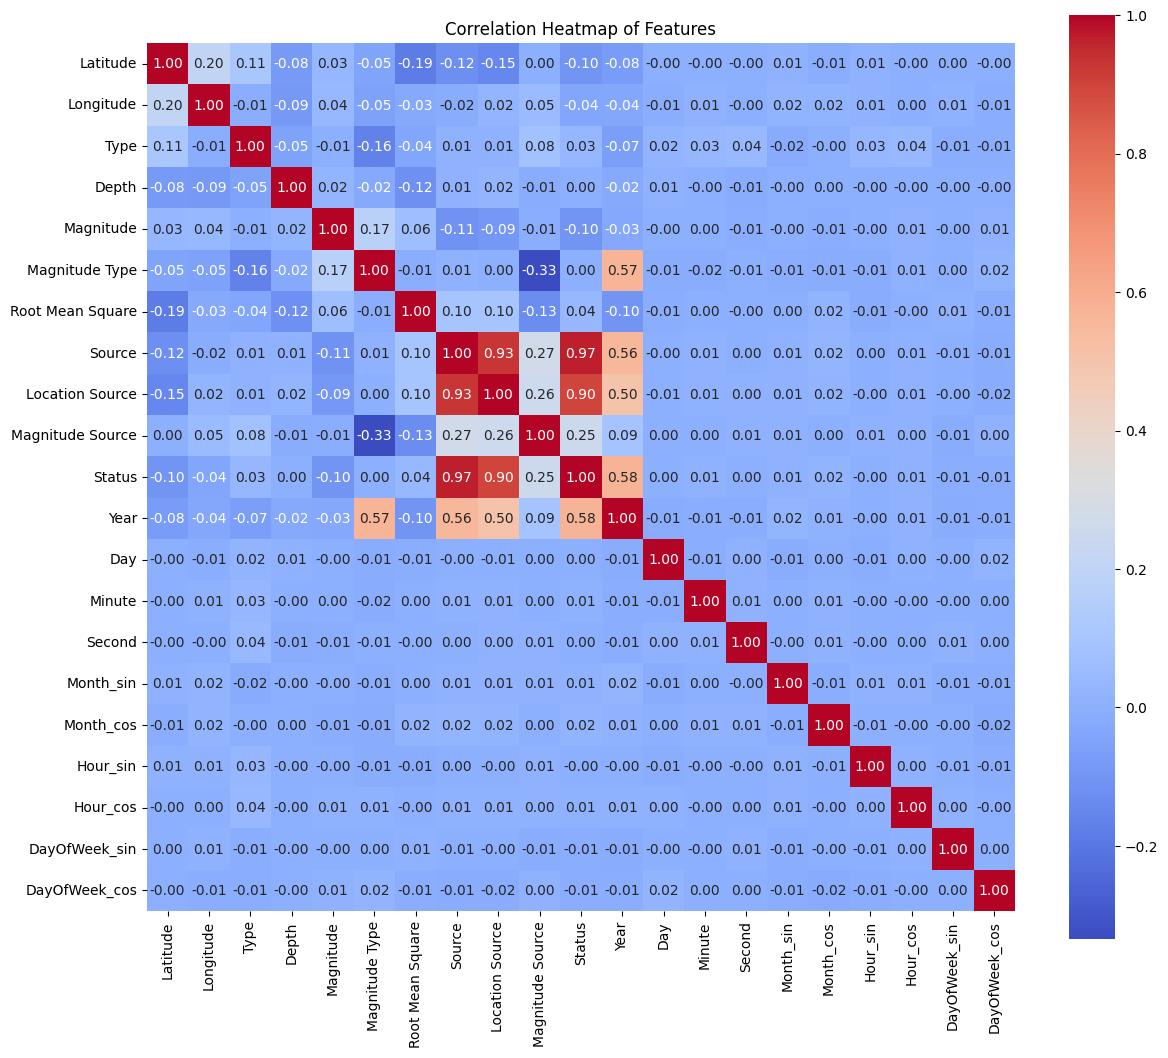

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric codes temporarily for correlation
categorical_cols = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']
df_corr = df.copy()
for col in categorical_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

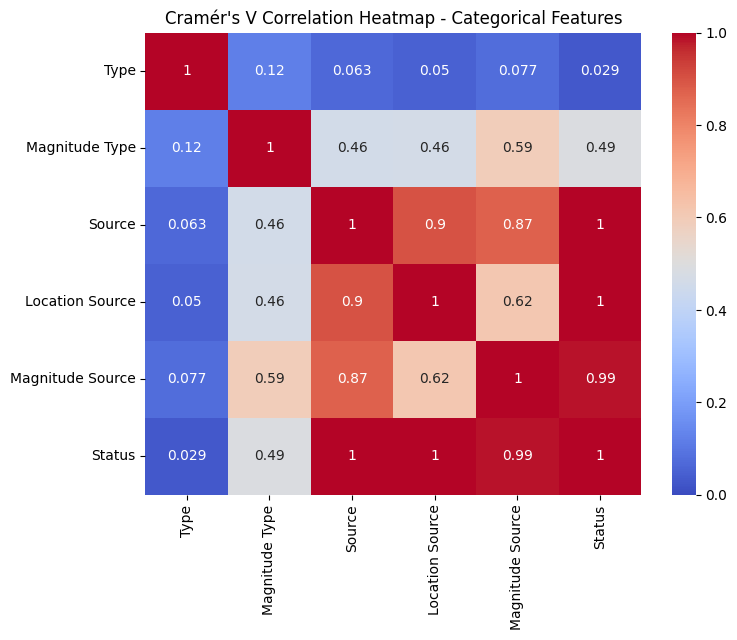

In [30]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select categorical columns
categorical_cols = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']

# Create empty DataFrame for Cramér's V values
cramers_results = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                              index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V for each pair
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap - Categorical Features")
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Root Mean Square  23412 non-null  float64
 7   Source            23412 non-null  object 
 8   Location Source   23412 non-null  object 
 9   Magnitude Source  23412 non-null  object 
 10  Status            23412 non-null  object 
 11  Year              23409 non-null  float64
 12  Day               23409 non-null  float64
 13  Minute            23409 non-null  float64
 14  Second            23409 non-null  float64
 15  Month_sin         23409 non-null  float64
 16  Month_cos         23409 non-null  float6

In [32]:
df.drop(['Minute', 'Second', 'DayOfWeek_sin','DayOfWeek_cos','Location Source', 'Magnitude Source'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Root Mean Square  23412 non-null  float64
 7   Source            23412 non-null  object 
 8   Status            23412 non-null  object 
 9   Year              23409 non-null  float64
 10  Day               23409 non-null  float64
 11  Month_sin         23409 non-null  float64
 12  Month_cos         23409 non-null  float64
 13  Hour_sin          23409 non-null  float64
 14  Hour_cos          23409 non-null  float64
dtypes: float64(11), object(4)
memory usage: 2.7+ MB


In [34]:
round(df['Source'].value_counts()*100/df.shape[0],2)

,count
Source,
US,88.12
ISCGEM,10.51
ISCGEMSUP,0.51
CI,0.26
GCMT,0.23
NC,0.22
AK,0.05
OFFICIAL,0.03
UW,0.03


In [35]:
from sklearn.preprocessing import OneHotEncoder
# List of categorical features
categorical_features = ['Type', 'Magnitude Type', 'Source', 'Status']

# Initialize OneHotEncoder (drop='first' to avoid multicollinearity, handle_unknown='ignore' to manage unseen categories)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_array = encoder.fit_transform(df[categorical_features])

# Get feature names for encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Concatenate the encoded DataFrame to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                23412 non-null  float64
 1   Longitude               23412 non-null  float64
 2   Type                    23412 non-null  object 
 3   Depth                   23412 non-null  float64
 4   Magnitude               23412 non-null  float64
 5   Magnitude Type          23412 non-null  object 
 6   Root Mean Square        23412 non-null  float64
 7   Source                  23412 non-null  object 
 8   Status                  23412 non-null  object 
 9   Year                    23409 non-null  float64
 10  Day                     23409 non-null  float64
 11  Month_sin               23409 non-null  float64
 12  Month_cos               23409 non-null  float64
 13  Hour_sin                23409 non-null  float64
 14  Hour_cos                23409 non-null

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List numeric columns to scale/normalize (bool columns excluded)
numeric_features = ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Root Mean Square', 'Year', 'Day',
                    'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos']

# Standard Scaling (z-score normalization)
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Alternatively, for Min-Max Normalization (uncomment below)
# normalizer = MinMaxScaler()

In [38]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status,Year,...,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Status_Reviewed
0,0.583377,0.844368,Earthquake,0.495984,0.277668,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006109,0.698849,Earthquake,0.075272,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739162,-1.701962,Earthquake,-0.413928,0.750418,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.017599,-0.503524,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.340688,0.691479,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Type,0
Depth,0
Magnitude,0
Magnitude Type,0
Root Mean Square,0
Source,0
Status,0
Year,3


In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Type,0
Depth,0
Magnitude,0
Magnitude Type,0
Root Mean Square,0
Source,0
Status,0
Year,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23409 entries, 0 to 23411
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                23409 non-null  float64
 1   Longitude               23409 non-null  float64
 2   Type                    23409 non-null  object 
 3   Depth                   23409 non-null  float64
 4   Magnitude               23409 non-null  float64
 5   Magnitude Type          23409 non-null  object 
 6   Root Mean Square        23409 non-null  float64
 7   Source                  23409 non-null  object 
 8   Status                  23409 non-null  object 
 9   Year                    23409 non-null  float64
 10  Day                     23409 non-null  float64
 11  Month_sin               23409 non-null  float64
 12  Month_cos               23409 non-null  float64
 13  Hour_sin                23409 non-null  float64
 14  Hour_cos                23409 non-null  flo

In [43]:
df.to_csv('preprocessed_earthquake_data.csv', index=False)

DAY 10

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_earthquake_data.csv to preprocessed_earthquake_data (1).csv


In [46]:
# 2. Load Data
df = pd.read_csv('preprocessed_earthquake_data.csv')

In [47]:
# 3. Quick Data Overview
print("Dataset Shape:", df.shape)
print("Sample Records:\n")
df.head()

Dataset Shape: (23409, 40)
Sample Records:



,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status,Year,...,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Status_Reviewed
0,0.583377,0.844368,Earthquake,0.495984,0.277668,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006109,0.698849,Earthquake,0.075272,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739162,-1.701962,Earthquake,-0.413928,0.750418,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.017599,-0.503524,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.340688,0.691479,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# 4. Data Cleaning (if needed)
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
# Impute or drop as appropriate (example: drop rows with missing target)
df = df.dropna(subset=['Status_Reviewed'])

Missing Values:
 Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Magnitude                 0
Magnitude Type            0
Root Mean Square          0
Source                    0
Status                    0
Year                      0
Day                       0
Month_sin                 0
Month_cos                 0
Hour_sin                  0
Hour_cos                  0
Type_Explosion            0
Type_Nuclear Explosion    0
Type_Rock Burst           0
Magnitude Type_MD         0
Magnitude Type_MH         0
Magnitude Type_ML         0
Magnitude Type_MS         0
Magnitude Type_MW         0
Magnitude Type_MWB        0
Magnitude Type_MWC        0
Magnitude Type_MWR        0
Magnitude Type_MWW        0
Source_ATLAS              0
Source_CI                 0
Source_GCMT               0
Source_ISCGEM             0
Source_ISCGEMSUP          0
Source_NC                 0
Source_NN                 0
Source_OFFICIAL           0
Sou

In [49]:
drop_columns = ['Type','Magnitude Type','Status', 'Source', 'Year', 'Day']  # Adjust as necessary
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

In [50]:
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [51]:
# 7. Modeling
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
# 8. Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

Confusion Matrix:
 [[ 503    0]
 [   0 4179]]
Accuracy Score: 1.0


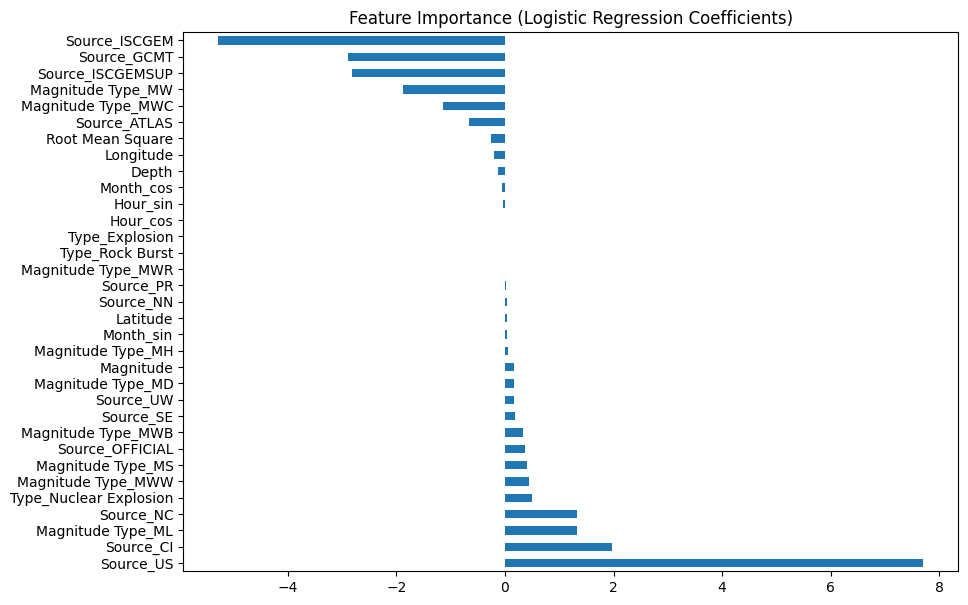

In [53]:
# 9. Feature Importance (Coefficients)
importance = pd.Series(model.coef_.flatten(), index=X.columns)
importance.sort_values(ascending=False).plot(kind='barh', figsize=(10,7))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

In [54]:
# 10. Optional: Save model
import joblib
joblib.dump(model, 'logreg_earthquake_status_reviewed.pkl')

['logreg_earthquake_status_reviewed.pkl']

day 11

Decision Tree Model Training

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_earthquake_data.csv to preprocessed_earthquake_data (2).csv


In [57]:
df = pd.read_csv('preprocessed_earthquake_data.csv')

In [58]:
print("Dataset Shape:", df.shape)
print("Sample Records:\n")
df.head()

Dataset Shape: (23409, 40)
Sample Records:



,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status,Year,...,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Status_Reviewed
0,0.583377,0.844368,Earthquake,0.495984,0.277668,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006109,0.698849,Earthquake,0.075272,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739162,-1.701962,Earthquake,-0.413928,0.750418,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.017599,-0.503524,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.340688,0.691479,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# 4. Data Cleaning (if needed)
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
# Impute or drop as appropriate (example: drop rows with missing target)
df = df.dropna(subset=['Status_Reviewed'])

Missing Values:
 Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Magnitude                 0
Magnitude Type            0
Root Mean Square          0
Source                    0
Status                    0
Year                      0
Day                       0
Month_sin                 0
Month_cos                 0
Hour_sin                  0
Hour_cos                  0
Type_Explosion            0
Type_Nuclear Explosion    0
Type_Rock Burst           0
Magnitude Type_MD         0
Magnitude Type_MH         0
Magnitude Type_ML         0
Magnitude Type_MS         0
Magnitude Type_MW         0
Magnitude Type_MWB        0
Magnitude Type_MWC        0
Magnitude Type_MWR        0
Magnitude Type_MWW        0
Source_ATLAS              0
Source_CI                 0
Source_GCMT               0
Source_ISCGEM             0
Source_ISCGEMSUP          0
Source_NC                 0
Source_NN                 0
Source_OFFICIAL           0
Sou

In [60]:
drop_columns = ['Type','Magnitude Type','Status', 'Source', 'Year', 'Day']  # Adjust as necessary
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

In [61]:
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
# 8. Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

Confusion Matrix:
 [[ 503    0]
 [   0 4179]]
Accuracy Score: 1.0


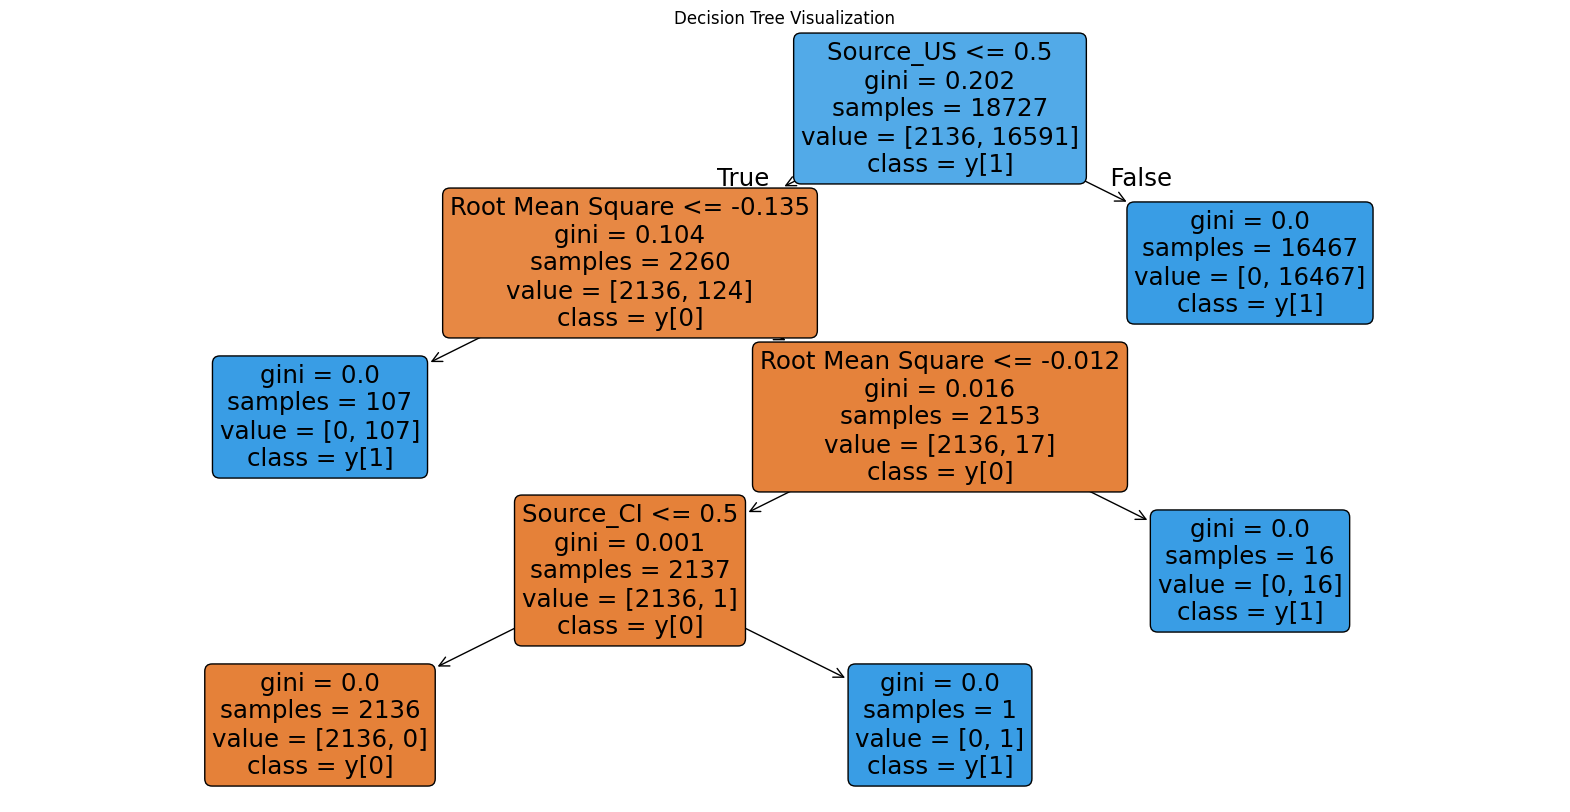

In [64]:
# 9. Visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [65]:
# 10. Optional: Save model
import joblib
joblib.dump(model, 'dtree_earthquake_status_reviewed.pkl')

['dtree_earthquake_status_reviewed.pkl']

# **DAY 11**
Baseline Models Evaluation & Error Analysis (Using Pickle Models)

In [66]:
## Imports and Data Loading
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Set plotting style
sns.set(style="whitegrid")

In [68]:
## Load and split the dataset
df = pd.read_csv('preprocessed_earthquake_data.csv')
drop_columns = ['Type','Magnitude Type','Status', 'Source', 'Year', 'Day']  # Adjust as necessary
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [69]:
import joblib
# Load models
logreg = joblib.load('logreg_earthquake_status_reviewed.pkl')
dtree = joblib.load('dtree_earthquake_status_reviewed.pkl')

In [70]:
# Model Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [71]:
## Classification Metrics and Plots (for classification task)
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))

print_classification_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_classification_metrics(y_test, y_pred_dtree, "Decision Tree")

--- Logistic Regression Metrics ---
Accuracy: 1.0
F1-score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

--- Decision Tree Metrics ---
Accuracy: 1.0
F1-score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682



In [72]:
# Confusion Matrices
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

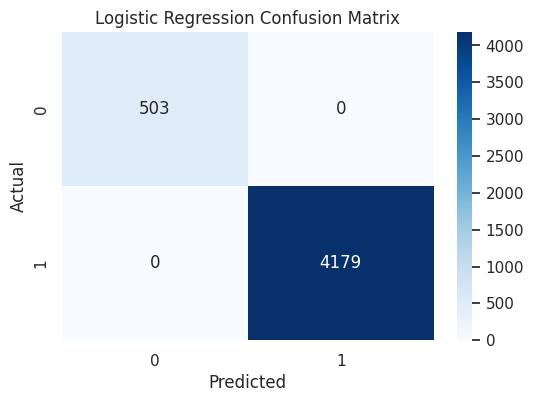

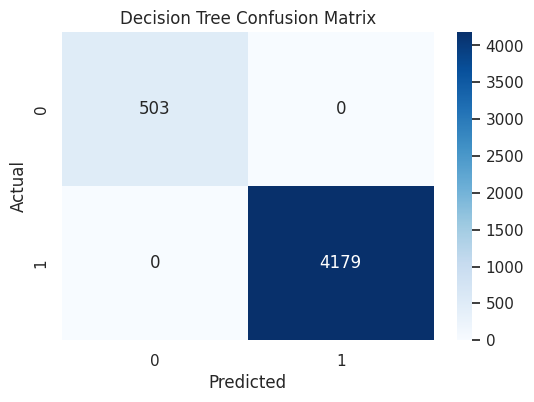

In [73]:
plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")
plot_confusion(y_test, y_pred_dtree, "Decision Tree Confusion Matrix")

In [74]:
# --- For regression tasks ---
print("MAE:", mean_absolute_error(y_test, y_pred_logreg))
print("MSE:", mean_squared_error(y_test, y_pred_logreg))
print("R² score:", r2_score(y_test, y_pred_logreg))

MAE: 0.0
MSE: 0.0
R² score: 1.0


In [75]:
print("MAE:", mean_absolute_error(y_test, y_pred_dtree))
print("MSE:", mean_squared_error(y_test, y_pred_dtree))
print("R² score:", r2_score(y_test, y_pred_dtree))

MAE: 0.0
MSE: 0.0
R² score: 1.0


In [76]:
# 4. Error Analysis
# Identify misclassified examples
misclassified_logreg = X_test[y_test != y_pred_logreg]
misclassified_dtree = X_test[y_test != y_pred_dtree]
print("--- Misclassified Samples (Logistic Regression) ---")
display(misclassified_logreg.head())

--- Misclassified Samples (Logistic Regression) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW


In [77]:
print("--- Misclassified Samples (Decision Tree) ---")
display(misclassified_dtree.head())

--- Misclassified Samples (Decision Tree) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW


# Base Models Evaluations with Noise Introduction and Custom parameters

In [78]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
# Load and preprocess the dataset
df = pd.read_csv('preprocessed_earthquake_data.csv')
drop_columns = ['Type', 'Magnitude Type', 'Status', 'Source', 'Year', 'Day']
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

In [80]:
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [82]:
logreg = LogisticRegression(C=0.5, max_iter=200, solver='saga', penalty='l2', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=200, random_state=42, solver='saga')

In [83]:
# Train Decision Tree with customized parameters
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [84]:
# Model Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [85]:
# Classification metrics and reports
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [86]:
print_classification_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_classification_metrics(y_test, y_pred_dtree, "Decision Tree")

--- Logistic Regression Metrics ---
Accuracy: 1.0
F1-score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

--- Decision Tree Metrics ---
Accuracy: 0.9997864160615122
F1-score: 0.9997865093323894
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682



In [87]:
# Confusion matrix plotting
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

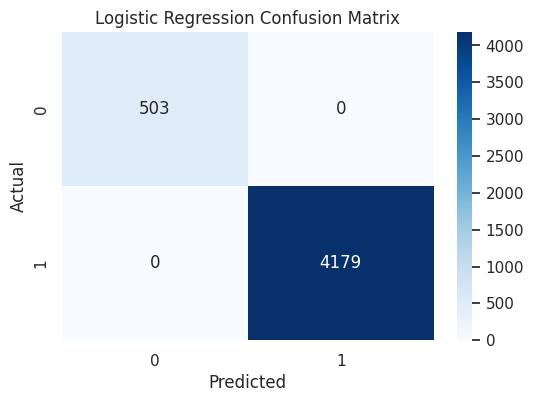

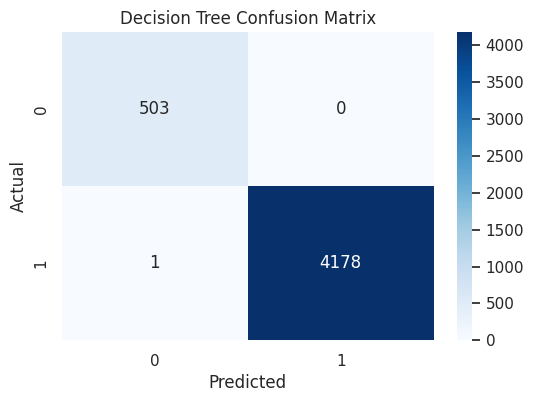

In [88]:
plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")
plot_confusion(y_test, y_pred_dtree, "Decision Tree Confusion Matrix")

In [89]:
# Regression metrics for analysis for Logistic Regression
print("MAE (Logistic Regression):", mean_absolute_error(y_test, y_pred_logreg))
print("MSE (Logistic Regression):", mean_squared_error(y_test, y_pred_logreg))
print("R² score (Logistic Regression):", r2_score(y_test, y_pred_logreg))

MAE (Logistic Regression): 0.0
MSE (Logistic Regression): 0.0
R² score (Logistic Regression): 1.0


In [90]:
print("MAE (Decision Tree):", mean_absolute_error(y_test, y_pred_dtree))
print("MSE (Decision Tree):", mean_squared_error(y_test, y_pred_dtree))
print("R² score (Decision Tree):", r2_score(y_test, y_pred_dtree))

MAE (Decision Tree): 0.00021358393848782572
MSE (Decision Tree): 0.00021358393848782572
R² score (Decision Tree): 0.9977726367328453


In [91]:
# Error analysis - misclassified samples
misclassified_logreg = X_test[y_test != y_pred_logreg]
misclassified_dtree = X_test[y_test != y_pred_dtree]

In [92]:
print("--- Misclassified Samples (Logistic Regression) ---")
display(misclassified_logreg.head())

print("--- Misclassified Samples (Decision Tree) ---")
display(misclassified_dtree.head())

--- Misclassified Samples (Logistic Regression) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW


--- Misclassified Samples (Decision Tree) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
22385,1.945447,-1.643428,0.221286,0.755036,0.108238,-1.474893,-0.022348,-1.503641,-0.426036,-0.012503,...,-0.007353,0.159735,-0.015496,-0.133421,0.075287,-0.137415,0.039506,0.153663,0.090204,0.073075
